In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from random import shuffle
from scipy.signal import stft
from scipy.io.wavfile import write



In [2]:
# sig1 = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/pure tune/250Hz.txt', delimiter='\t')
sig1 = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/bowel sounds/Bowel_sound_normal_C.txt', delimiter='\t')
sig1

array([1635.25, 1663.63, 1648.81, ..., 1226.25, 1222.94, 1637.44])

In [3]:
write("/Users/sehwan/Desktop/datasets/batch 2/Bowel_sound_normal_C.wav", 250, sig1.flatten())
# write("/Users/sehwan/Desktop/datasets/batch 2/output4.wav", 5000, pred.flatten())


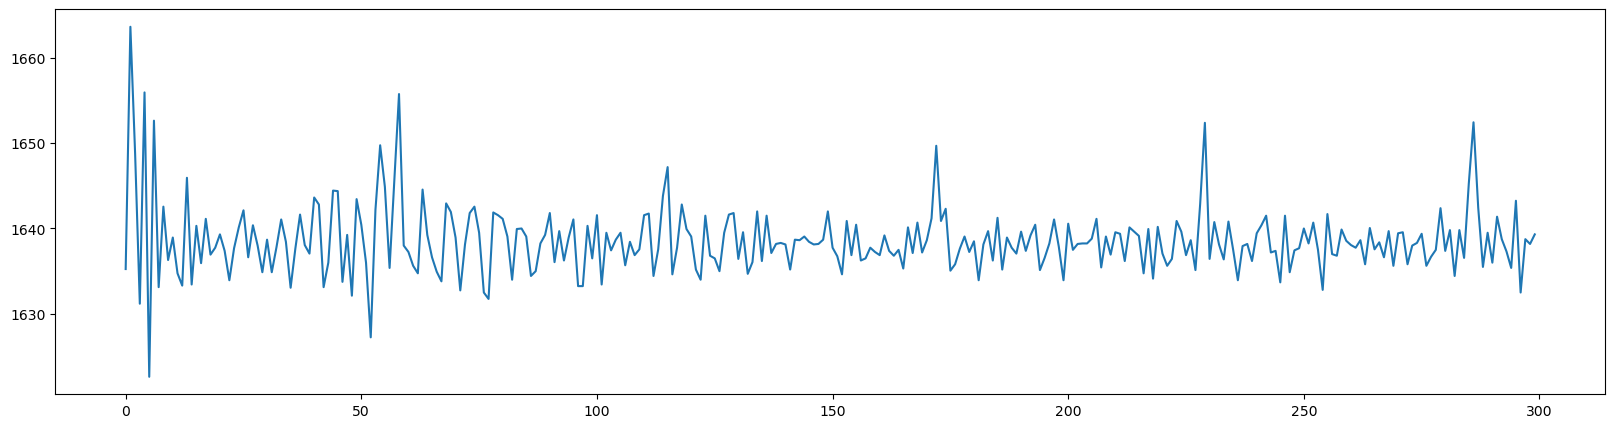

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(sig1[:300])

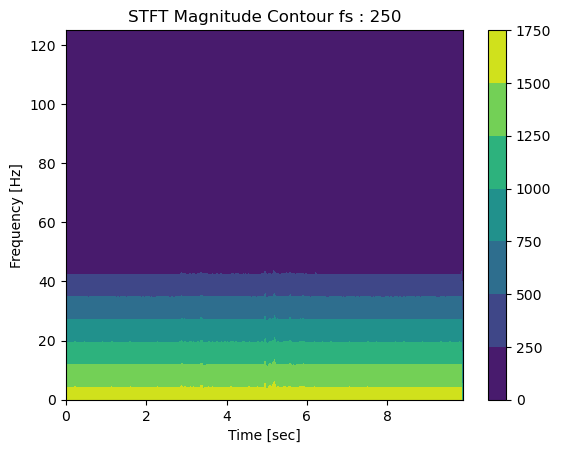

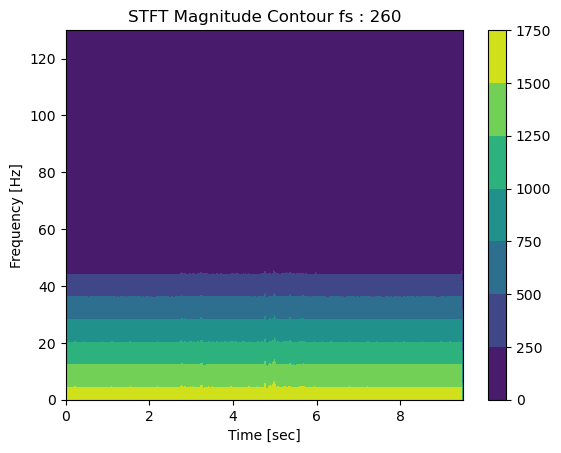

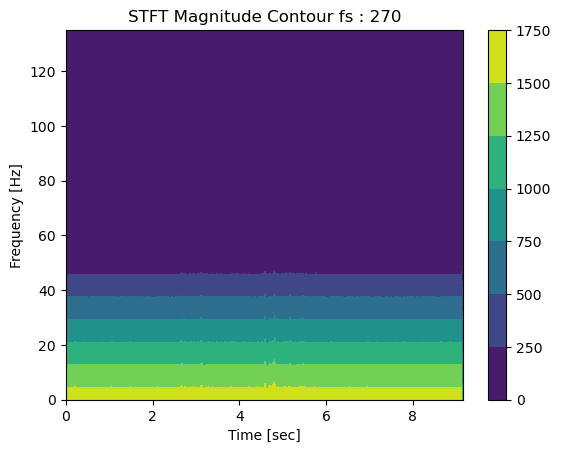

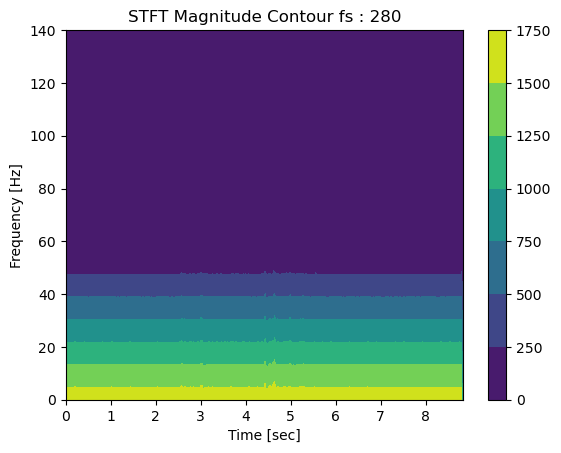

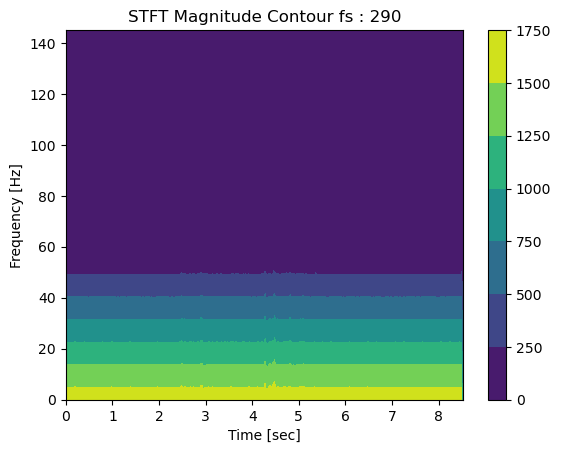

In [5]:
# Define the sampling frequency and time vector
for fs in range(250, 300, 10):
    # fs = 250  # Hz
    t = np.arange(len(sig1)) / fs

    # Define the STFT parameters
    window = 'hann'
    nperseg = 10
    noverlap = nperseg // 2
    nfft = nperseg

    # Compute the STFT
    f, t_stft, Zxx = stft(sig1, fs=fs, window=window, nperseg=nperseg,
                        noverlap=noverlap, nfft=nfft)

    # Plot the STFT
    # plt.pcolormesh(t_stft, f, np.abs(Zxx), cmap='jet')
    # plt.xlabel('Time [sec]')
    # plt.ylabel('Frequency [Hz]')
    # plt.title('STFT Magnitude')
    # plt.colorbar()
    # plt.show()
    
    
    plt.contourf(t_stft, f, np.abs(Zxx), cmap='viridis')
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    plt.title('STFT Magnitude Contour fs : ' + str(fs))
    plt.colorbar()
    plt.show()

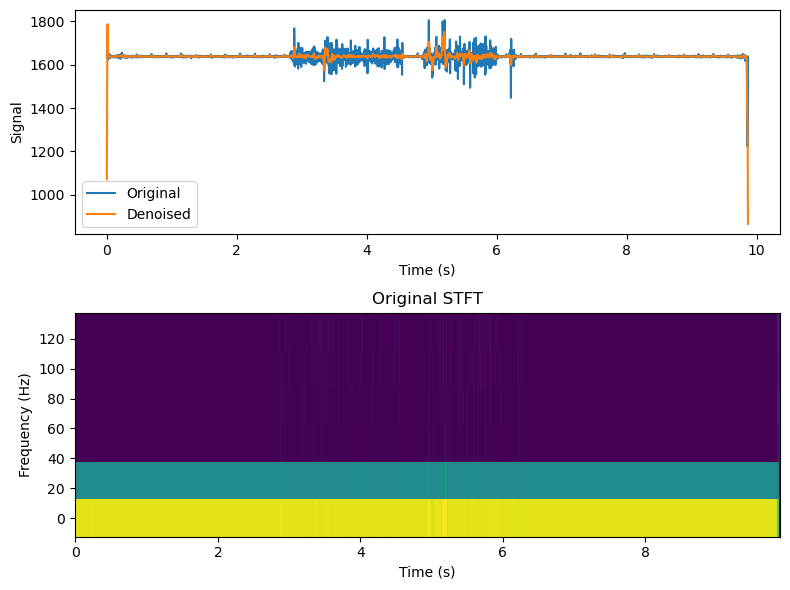

In [6]:
from scipy.signal import stft, istft
import numpy as np

# Define the signal and parameters
fs = 250  # Hz
t = np.arange(len(sig1)) / fs
window = 'hann'
nperseg = 10
noverlap = nperseg // 2
nfft = nperseg

# Compute the STFT
f, t_stft, Zxx = stft(sig1, fs=fs, window=window, nperseg=nperseg,
                    noverlap=noverlap, nfft=nfft)

# Create a mask for the STFT
mask = np.abs(Zxx) > np.mean(np.abs(Zxx))

# Apply the mask to the STFT
Zxx_denoise = Zxx * mask

# Inverse STFT to get the denoised signal
_, x_denoise = istft(Zxx_denoise, fs=fs, window=window, nperseg=nperseg,
                     noverlap=noverlap, nfft=nfft)

# Plot the results
# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(2, 1, figsize=(8, 6))
# axs[0].plot(t[:len(x_denoise)], sig1[:len(x_denoise)], label='Original')
# axs[0].plot(t[:len(x_denoise)], x_denoise, label='Denoised')
# axs[0].set_xlabel('Time (s)')
# axs[0].set_ylabel('Signal')
# axs[0].legend()
# print(len(t))
# print(len(x_denoise))


fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(t, sig1, label='Original')
axs[0].plot(t, x_denoise[:len(t)], label='Denoised')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal')
axs[0].legend()

axs[1].pcolormesh(t_stft, f, np.abs(Zxx), cmap='viridis')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_title('Original STFT')
plt.tight_layout()
plt.show()


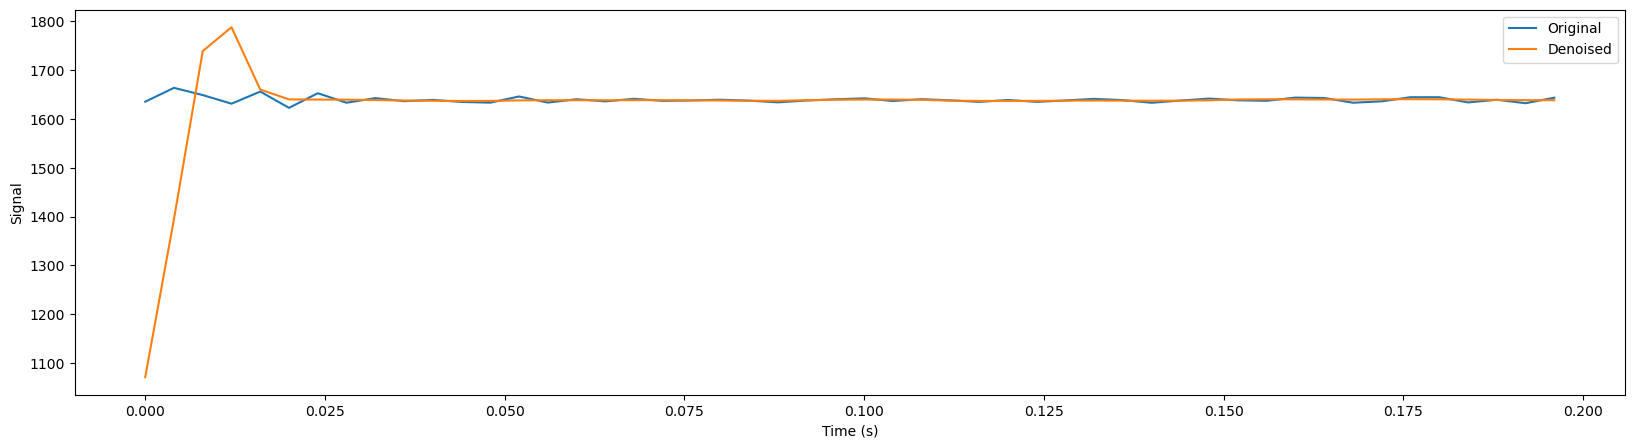

In [7]:
# plt.subplots(2, 1, figsize=(8, 6))
llen = 50
plt.figure(figsize=(20, 5))
plt.plot(t[:llen], sig1[:llen], label='Original')
plt.plot(t[:llen], x_denoise[:len(t[:llen])], label='Denoised')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()

In [8]:
write("/Users/sehwan/Desktop/datasets/batch 2/Bowel_sound_normal_C_de.wav", 250, x_denoise.flatten())